In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
from pathlib import Path
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

christmas_dir = Path('..','data', 'Train_Test_Folder', 'train', 'christmas')
normal_dir = Path('..','data', 'Train_Test_Folder', 'train', 'normal')

christmas = list(christmas_dir.glob('*'))
normal = list(normal_dir.glob('*'))

# Creating bar charts

In [2]:
def show_palette(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [3]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    #print(perc)
    #print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

In [4]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.imshow(img_2)
    ax.axis('off')
    plt.show()

In [34]:
def run_functions(list_of_paths):
    my_big_array = make_big_array(list_of_paths)


    clt_3 = KMeans(n_clusters=15, n_init=10)    
    clt_3.fit(my_big_array)
    show_palette(my_new_big_array, palette_perc(clt_3))

hi
here
here 2
4


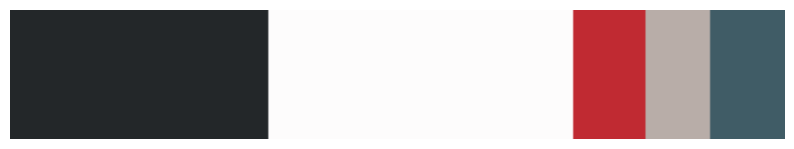

5


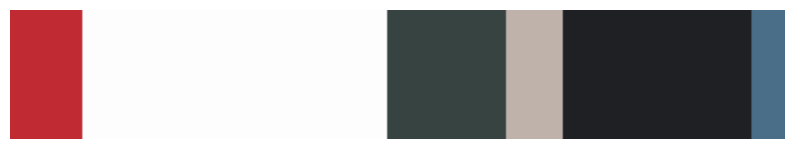

6


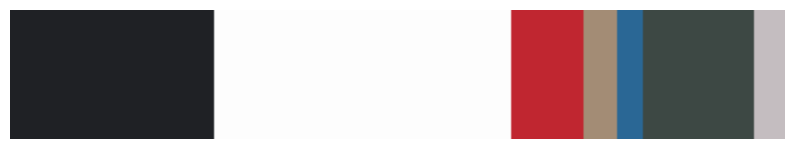

In [6]:
#run_functions(christmas)

In [29]:
def make_big_array(list_of_paths):    
    my_big_array = np.vstack([np.reshape(Image.open(str(image)), (-1, 3)) for image in list_of_paths])
    #my_new_big_array = [pixel for pixel in my_big_array if list(pixel) != [255, 255, 255]]
    return my_big_array


In [30]:
import collections

def generate_historgram(my_array):
    for i, color in enumerate(['red', 'blue', 'green']):
        data = np.array(my_array)[:, i]
        data.sort()
        mydict = collections.Counter(data)

        plt.plot(mydict.keys(), mydict.values(), color=color)
    plt.show

In [31]:
christmas_array = make_big_array(christmas)

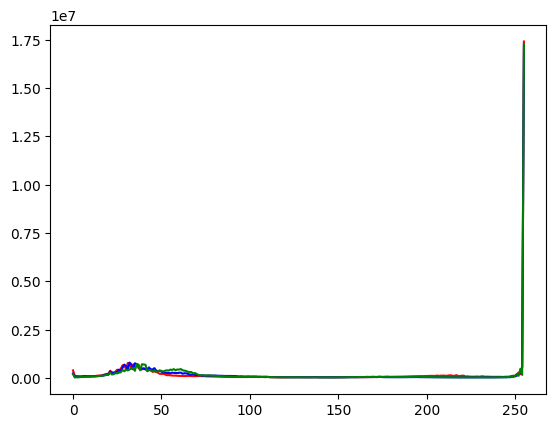

In [32]:
generate_historgram(christmas_array)

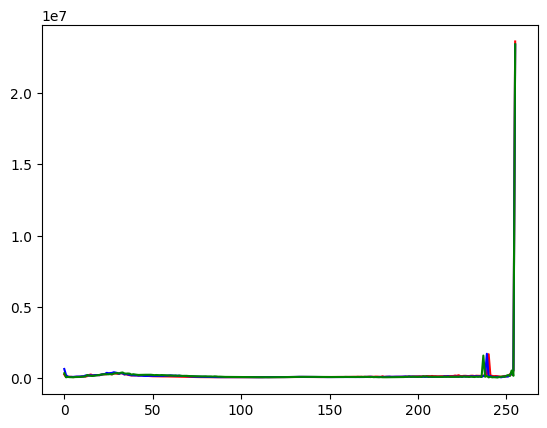

In [33]:
normal_array = make_big_array(normal)
generate_historgram(normal_array)